# Objective

Help Microsoft choose waht type of movies they should implement

To help choose which movies are best for Microsoft to start with, we should consider using

**movie genres**

**production budget**

**revenue(gross)**

**votes/ratings**

## Methodology

Some areas you can look to examine are movie genres (Thriller, Drama, Comedy, etc.), movie ratings, budget, social media discussion, and critic or user reviews. Your team gets to define its _own questions_ about the movie industry and then use its knowledge of descriptive statistics and the EDA process to try and answer those questions. <br>
Questions to consider:
- How are you defining _success_ ?
 - Return on investment?
 - Revenue?
 - Garunteed box-office hit?
 - Social media buzz?

In [53]:
# Import all libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import re
from datetime import datetime

%matplotlib inline

In [54]:
# Creating data-frames out of the existing files and assigning them names
movie_gross_df = pd.read_csv("Data/bom.movie_gross.csv.gz")
name_basics_df = pd.read_csv("Data/imdb.name.basics.csv.gz")
akas_df = pd.read_csv("Data/imdb.title.akas.csv.gz")
basics_df = pd.read_csv("Data/imdb.title.basics.csv.gz")
crew_df = pd.read_csv("Data/imdb.title.crew.csv.gz")
principals_df = pd.read_csv("Data/imdb.title.principals.csv.gz")
ratings_df = pd.read_csv("Data/imdb.title.ratings.csv.gz")
movies_df = pd.read_csv("Data/tmdb.movies.csv.gz")
movie_budget_df = pd.read_csv("Data/tn.movie_budgets.csv.gz")
rt_info_df = pd.read_csv("Data/rt.movie_info.tsv.gz", sep='\t')
rt_reviews_df = pd.read_csv("Data/rt.reviews.tsv.gz", sep='\t', encoding="unicode_escape")

# Data Description

**movie_budget_df** 
- release date 
- movie name
- production budget
- domestic gross
- worldwide gross

**movie_gross_df**
- movie name
- studio name
- domestic gross
- foriegn gross
- year of movie

**movies_df**
- genre ids
- the id
- original language filmed in
- movie name
- popularity
- release date
- vote
- vote count

**name_basics_df**

**akas_df**

**basics_df**
- primary and original title
- start year
- runtime in mins
- genre

**crew_df**
- directors
- writers

**principals_df**

**ratings_df**
- average num. of ratings
- num. of votes

**rt_reviews_df**
- review
- rating
- fresh/rotten
- critic/top critic
- publisher
- date

**rt_info_df**
- synopsis
- movie rating
- genre
- director
- writer
- release date
- dvd date
- currency
- box office
- runtime
- studio

# Data that are similar

movie_budget_df & movie_gross_df

movies_df & ratings_df

# Data To Use

**movie_gross_df**

**movie_budget_df**

**movies_df**

# What To Show
Name of Movie

**Genre**

**Movie Rating**

Release Date - Not a priority

**Production Budget/Gross Revenue/ROI**

Ratings

## Game-Plane
- **From The movie_budget_df**

 - The **first** data visulization will show domestic ROI

 - The **second** data visualization will show worldwide ROI
 
- **From The 

# **Code Starts Here**

### What Data-Frames Were Chosen
We chose two dataframes to use, **movie_budget_df** and **movie_gross_df**

## Problem
The **movie_budget_df** had special characters, "$" and ",", that the other dataframe, **movie_gross_df** did not.

We are not able to merge because of these differences

## Solution
We created a function that allows us to input any dataframe and take out the commas and USD signs

In [55]:
# Gitting rid of "$" and "," in a dataframe
def remove_format(dataframe):
    for strings in dataframe:
        dataframe.replace('[\$,)]','', regex=True, inplace=True)

In [56]:
# Removing specified characters in this dataframe
remove_format(movie_budget_df)

# Changing Data Types

## Problem
There's more Inconsistency with our dataframes. **movie_budget_df** has a dtype of int, while **movie_gross_df** had a dtype of float.

In order to merge we need to have our data as consistent as possible

## Solution
We access the **movie_budget_df** and choose our specific columns and change the dtype to a float.

Now our **movie_budget_df** has a float dtype, just like the **movie_gross_df**

In [57]:
# Changing data types to a float to match same content
movie_budget_df['production_budget']  = movie_budget_df['production_budget'].astype(float)
movie_budget_df['domestic_gross']  = movie_budget_df['domestic_gross'].astype(float)
movie_budget_df['worldwide_gross']  = movie_budget_df['worldwide_gross'].astype(float)

In [58]:
movie_budget_df.info() # Checking to see if info matches in order to merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [59]:
movie_gross_df.info() # Checking to see if info matches in order to merge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Dropping Columns

## Problem
We've found missing data in **movie_gross_df**

## Solution
We use the dropna() method and set its' parameters as inplace=True. 

We set that specific key argument because that allows our changes to be inside that dataframe, acting as if it was a save and remember key.

In [60]:
# Dropping all missing values(NaN) inside the dataframe
movie_gross_df.dropna(inplace=True)

In [61]:
movie_gross_df.isna().sum() # Sums the amount of NaN's there are in each column

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [62]:
movie_budget_df.isna().sum() # Sums the amount of NaN's there are in each column

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# Changing Column Names

## Problem
Not able to combine data without recieving NaN or an error because the column names were different

## Solution
Used the rename() method to change certain titles

In [63]:
# Changing column names
movie_gross_df = movie_gross_df.rename(columns={"title": "movie", "foreign_gross": "worldwide_gross"})

In [64]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,Jun 7 2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,May 1 2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


# Adding 2 New Columns

## Description
Added 2 new columns that shows the ROI of worldwide and domestic 

In [65]:
percent = 100 # Defining the percent for we can convert a given number into percent form

# Creating a new column that shows ROI
movie_budget_df["worldwide_roi"] = (movie_budget_df.worldwide_gross / movie_budget_df.production_budget) * percent
movie_budget_df["domestic_roi"] = (movie_budget_df.domestic_gross / movie_budget_df.production_budget) * percent

In [66]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,domestic_roi
0,1,Dec 18 2009,Avatar,425000000.0,760507625.0,2.776345e+09,653.257713,178.942971
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,254.667286,58.710150
2,3,Jun 7 2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,42.789243,12.217814
3,4,May 1 2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,424.384139,138.840250
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,415.369636,195.640815


# Looking At **rt_info_df**

## Description
Using the **rt_info_df** dataframe we can possibly make 1 or 2 data visualizations:
    
- We can use this to choose what movie rating does a specific genre usually recieve

- Or we can see a trend on what genres are being produced more in the following years, meaning, what genre is more likely to be produced, and is ok to produced now, rather than back then.

**We can choose to use 1 of these suggestions or both**

In [67]:
# Dropping all missing values, NaN.
rt_info_df.dropna(inplace=True)

In [68]:
rt_info_df.head() # We can use this to choose what movie rating does a specific genre usually recieve

# Or we can see a trend on what genres are being produced more in the following years, meaning, what genre is more likely to be produced, and is ok to produced now, rather than back then.

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [69]:
# Changing column name
rt_info_df = rt_info_df.rename(columns={"theater_date": "release_date"})

# Changing More Of The **rt_info_df** Dataframe
We want to create a data visualization around this data using ratings and years.

## Problem
There is not year column in order to create our data visualization.
We also need to format our column to get just the year

## Solution
Used the **to_datetime()** method on our release date in order to transform the format

Created a new column named **year** and got the year from the already formatted **release_date** column

In [70]:
# Altering release_date column to only show years
rt_info_df['release_date'] = pd.to_datetime(rt_info_df["release_date"]) # Changes the release_date column to a date time format

rt_info_df['year'] = rt_info_df['release_date'].dt.year # Creating a new column called years that shows only the years from the release_date column

# Looking At What To Drop In **rt_info_df**
There's data that will be irrelevant to our graph; this is shown in the year column and the ratings column

## Problem
Data that's not paramount to our graph

## Solution
We search for said irrelevant data using the **unique()** method. This will show the values that we have, without duplication.

We then use the **value_counts()** method to check how many values there are for a key.

We want to drop the rows that have small values attached to it.

We want to drop our values using the **drop()** method and add said row's index.

We find the index of a value by using **loc**. This returns the entire row(s) we are looking for.
We can now use the **drop()** method and set the index that we want to drop

In [71]:
# Seeing years in our year column, so we can drop the ones we don't want
rt_info_df.year.unique()

array([2012, 2002, 2006, 2010, 2013, 2004, 2003, 2011, 2016, 2001, 2009,
       2000, 2005, 2015, 2007, 2014, 2008, 2017, 1974, 1993])

In [72]:
rt_info_df.rating.unique()

array(['R', 'PG-13', 'PG', 'NR', 'G', 'NC17'], dtype=object)

In [73]:
rt_info_df.year.value_counts()

2010    18
2004    18
2007    17
2006    17
2013    16
2009    16
2012    15
2011    14
2005    14
2003    14
2002    14
2016    11
2008    10
2001     9
2015     9
2014     9
2017     7
2000     5
1993     1
1974     1
Name: year, dtype: int64

In [74]:
# Finding what this specific year's index is, so we can drop that row
rt_info_df.loc[rt_info_df.year == 1974]

,id,synopsis,rating,genre,director,writer,release_date,dvd_date,currency,box_office,runtime,studio,year
691,884,Freebie (James Caan) and the Bean (Alan Arkin)...,R,Action and Adventure|Comedy|Drama,Richard Rush,Robert Kaufman,1974-12-25,"Jan 11, 2011",$,"8,300",114 minutes,Warner Bros. Pictures,1974


In [75]:
# Finding what this specific year's index is, so we can drop that row
rt_info_df.loc[rt_info_df.year == 1993]

,id,synopsis,rating,genre,director,writer,release_date,dvd_date,currency,box_office,runtime,studio,year
913,1180,Despite having recently presided over a very s...,PG,Animation|Kids and Family|Science Fiction and ...,Henry Selick|Tim Burton,Tim Burton|Caroline Thompson|Michael McDowell,1993-10-24,"Dec 2, 1997",$,"8,616,662",76 minutes,Touchstone Pictures,1993


In [76]:
rt_info_df.drop(index=913, inplace=True) # Dropping a year by its index

In [77]:
rt_info_df.drop(index=691, inplace=True) # Dropping a year by its index

# Dropping Certain Rating On **rt_info_df**
Dropping irrelevant data

## Problem
In our dataframe there is a value that only shows up once.

We want to git rid of that irrelevant data in order to have a more paramount representation of our data

## Solution
We use **loc** in order to find what row NC17 occupies.

If we are able to get the index of NC17, we are able to use the **drop()** method to drop that row.

We find the row and drop it. We then use the **inplace** argument and set it equals to "True" in order to keep that change inside the dataframe 

In [78]:
rt_info_df.rating.value_counts()

R        104
PG-13     77
PG        37
NR         9
G          5
NC17       1
Name: rating, dtype: int64

In [79]:
rating_df = pd.DataFrame(rt_info_df.groupby(["rating", "year"])["year"].count())

# renaming column from year to count
rating_df.columns = ["count"]

# to_records at end and pd.Dataframe again

In [80]:
rating_df = pd.DataFrame(rating_df.to_records())

In [81]:
rt_info_df.groupby(["rating"])["year"].count()

rating
G          5
NC17       1
NR         9
PG        37
PG-13     77
R        104
Name: year, dtype: int64

In [82]:
# Changing to DF to get to_records()
pd.DataFrame(rt_info_df.groupby(["rating"])["year"].count())

,year
rating,
G,5
NC17,1
NR,9
PG,37
PG-13,77
R,104


In [83]:
# Finding the row for NC17 in order to retrive its index, that way we can drop the row
rt_info_df.loc[rt_info_df.rating == "NC17"] # Index is 1215

,id,synopsis,rating,genre,director,writer,release_date,dvd_date,currency,box_office,runtime,studio,year
1215,1567,Lust is in the air on Harford Road and Sylvia ...,NC17,Comedy,John Waters,John Waters,2004-09-24,"Jun 14, 2005",$,"1,260,219",89 minutes,New Line Cinema,2004


In [84]:
# Found NC17's row information. Now we can delete the row
rt_info_df.drop(index=1215, inplace=True)

# Using **movies_df**

## Description
Able to use the **movie_df** dataframe and compare which genres recieves high votes. This will allow us to see what genres people want more of

## Problem
The **movie_df** has the genre_ids column in ids/codes. The reader does not understand what the numbers in the genre_ids column of **movie_df** mean.

## Solution
Able to google genre ids and put it into a dictionary. The genre name is the key, while the values are the genre ids.

This allows us to match the ids in the dataframe to the genre dictionary's keys.

If the keys in the dictionary match the numbers/ids in the genre_id column then it will replace it with the dictionary's values, which are the genre names.

In [85]:
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [86]:
genre_id_in_str = {"action": "28", "animated": "16", "documentary": "99", "drama": "18",
            "family": "10751", "fantasy": "14", "history": "36", "comedy": "35", 
            "war": "10752", "crime": "80", "music": "10402", "mystery": "9648",
            "romance": "10749", "sci fi": "878", "horror": "27",
            "TV movie": "10770", "thriller": "53", "western": "37", 
            "adventure": "12"}

In [87]:
genre_id = {"action": 28, "animated": 16, "documentary": 99, "drama": 18,
            "family": 10751, "fantasy": 14, "history": 36, "comedy": 35, 
            "war": 10752, "crime": 80, "music": 10402, "mystery": 9648,
            "romance": 10749, "sci fi": 878, "horror": 27,
            "TV movie": 10770, "thriller": 53, "western": 37, 
            "adventure": 12}

In [88]:
# Returns ALL key, value pairs in a tuple
genre_id.items()

dict_items([('action', 28), ('animated', 16), ('documentary', 99), ('drama', 18), ('family', 10751), ('fantasy', 14), ('history', 36), ('comedy', 35), ('war', 10752), ('crime', 80), ('music', 10402), ('mystery', 9648), ('romance', 10749), ('sci fi', 878), ('horror', 27), ('TV movie', 10770), ('thriller', 53), ('western', 37), ('adventure', 12)])

In [89]:
# If the genre_ids in movies_df match the values 
# in the genre id dict, replace it with the genre id dict's keys   
def fetch_genre(dataframe):
    for key, values in genre_id_in_str.items():
        for value in values:
            if value in dataframe:
                return key

In [90]:
# ONLY RUN THIS CODE BLOCK 1 TIME, OR YOU WILL RECIEVE AN ERROR AND HAVE TO RUN IT FROM THE TOP
movies_df["genre_ids"] = movies_df["genre_ids"].apply(fetch_genre)

In [91]:
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,action,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,action,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,action,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,animated,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,action,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [92]:
# Renaming certain columns
movies_df = movies_df.rename(columns={"title": "movie"})

In [93]:
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,movie,vote_average,vote_count
0,0,action,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,action,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,action,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,animated,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,action,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# **DATA VISUALIZATIONS**
Bubble Plot

## **rt_info_df**
Using Ratings, Years, and number of Occurrences

In [94]:
rt_info_df.year.unique()

array([2012, 2002, 2006, 2010, 2013, 2004, 2003, 2011, 2016, 2001, 2009,
       2000, 2005, 2015, 2007, 2014, 2008, 2017])

In [95]:
rt_info_df.rating.unique()

array(['R', 'PG-13', 'PG', 'NR', 'G'], dtype=object)

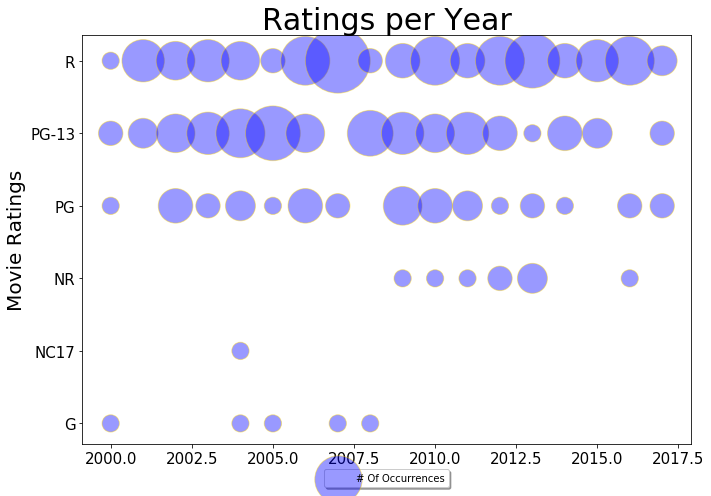

In [96]:
# Changing the size of the figure in inches
plt.figure(figsize=(10, 7))

# z-axis
z = rating_df["count"]


# Ttick Marks
plt.yticks(fontsize=15)
plt.xticks(fontsize=15 )

# Labels
plt.ylabel("Movie Ratings", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.title("Ratings per Year", fontsize=30)

# MAKING OUR PLOT
plt.scatter(rating_df.year, rating_df.rating, 
            s=rating_df["count"]*300, 
            color="blue", alpha=0.4, 
            label="# Of Occurrences", edgecolors="gold")

# Doesnt Cut off data that's we are using
plt.tight_layout()

plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.05), 
           shadow=True, ncol=2)

plt.show()

# OTHER DATA VISUALIZATION

In [97]:
movie_budget_df['domestic_roi']=(movie_budget_df['domestic_gross']-movie_budget_df['production_budget'])/movie_budget_df['production_budget']
movie_budget_df['worldwide_roi']=(movie_budget_df['worldwide_gross']-movie_budget_df['production_budget'])/movie_budget_df['production_budget']

In [98]:
movie_budget_df['release_date']=pd.to_datetime(movie_budget_df['release_date']) #converting release date to datetime object
movie_budget_df['year']=movie_budget_df['release_date'].dt.year
movie_budget_df['month']=movie_budget_df['release_date'].dt.month
movie_budget_df['year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1976, 1965, 1962, 1964, 1959, 1966, 1974, 1956,
       1975, 1973, 1960, 1967, 1968, 1971, 1951, 1972, 1961, 1946, 1944,
       1953, 1954, 1957, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1933, 1935, 1931, 1916, 1929, 1934, 1915, 1920])

In [99]:
time_df=movie_budget_df.loc[(movie_budget_df['year']>=2010) & (movie_budget_df['year']<2020)]
time_df.head()
print(time_df['domestic_roi'].min())
print(time_df['domestic_roi'].max())
time_df.loc[time_df['domestic_roi']==time_df['domestic_roi'].max(),'movie']

-1.0
226.6441


5679    The Gallows
Name: movie, dtype: object

In [100]:
# sns.set_style('darkgrid')
# sns.set_context('poster')
# plt.figure(figsize=(18, 8))
# g1=sns.boxplot(x='year',y='domestic_roi',data=time_df)
# g1.set(xlabel = "Year", ylabel='Domestic ROI (%)', title='Domestic ROI by Year')
# g1.set(ylim=(-2, 6))
# plt.savefig('dom_year.png')
# plt.show(g1)

In [ ]:
# plt.figure(figsize=(18, 8))
# g2=sns.boxplot(x='year',y='worldwide_roi',data=time_df)
# g2.set(xlabel = "Year", ylabel='Worldwide ROI (%)', title='Worldwide ROI by Year')
# g2.set(ylim=(-2, 8))
# plt.savefig('wol_year.png')
# plt.show(g2)